<a href="https://colab.research.google.com/github/YitongSunMA/data_analytics_resume/blob/main/IBM_Attrition_%26_Monthly_income_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#pip install plotly

**Data Cleaning** 

In [84]:
from google.colab import files 
uploaded = files.upload()
HR_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [85]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
HR_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
HR_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
HR_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
HR_data['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

In [ ]:
#get unique lables of literal/seemingly binary variables
print(HR_data['Attrition'].unique())
print(HR_data['BusinessTravel'].unique())
print(HR_data['Department'].unique())
print(HR_data['EducationField'].unique())
print(HR_data['Gender'].unique())
print(HR_data['JobRole'].unique())
print(HR_data['MaritalStatus'].unique())
print(HR_data['Over18'].unique())
print(HR_data['OverTime'].unique())


['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [86]:
#drop useless/meaningless columns
HR_data_clean = HR_data.drop(columns = ['Over18','EmployeeCount', 'EmployeeNumber','DailyRate','HourlyRate','StandardHours'])
HR_data_clean.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [87]:
from sklearn.preprocessing import LabelEncoder
x = HR_data_clean['Attrition']
le = LabelEncoder()
x = le.fit_transform(x)
HR_data_clean['Attrition'] = x

HR_data_clean

#Attrition: 1 indicates Yes and 0 indicates no

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,4,Male,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


**Data Exploration - Attrition** 

**1.Experience**

In [5]:
left_df = HR_data_clean[HR_data_clean['Attrition'] == 1]
stayed_df = HR_data_clean[HR_data_clean['Attrition'] == 0]

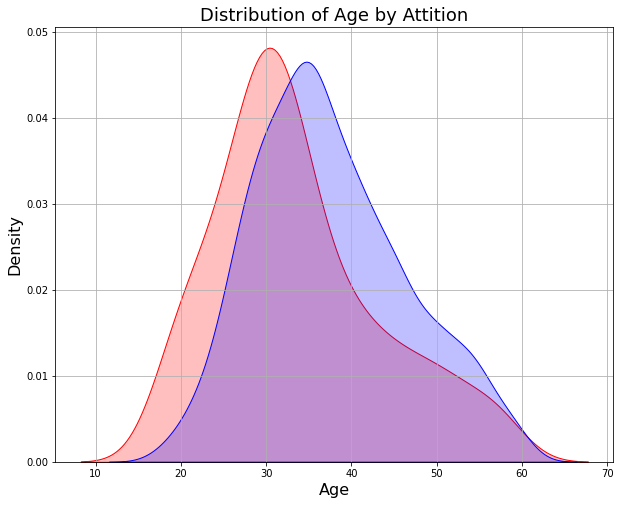

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(left_df['Age'],label= 'Attrition:Yes', shade = True, color = 'r')
sns.kdeplot(stayed_df['Age'], label= 'Attrition:No', shade = True, color = 'b')
plt.title('Distribution of Age by Attition',fontsize=18)
plt.ylabel('Density',fontsize=16)
plt.xlabel('Age',fontsize=16)
plt.grid(True)
plt.show()
#Younger employees are more likely to leave the company. The range is concentrated under 30.

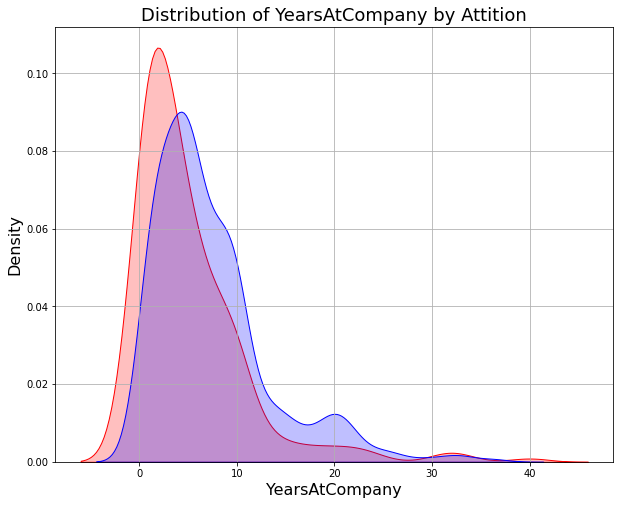

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(left_df['YearsAtCompany'],label= 'Attrition:Yes', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsAtCompany'], label= 'Attrition:No', shade = True, color = 'b')
plt.title('Distribution of YearsAtCompany by Attition',fontsize=18)
plt.ylabel('Density',fontsize=16)
plt.xlabel('YearsAtCompany',fontsize=16)
plt.grid(True)
plt.show()
#Employees who have worked in the company for a shorter time are more likely to leave the company. The range is concentrated under 4.

**2.Department and Job level**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


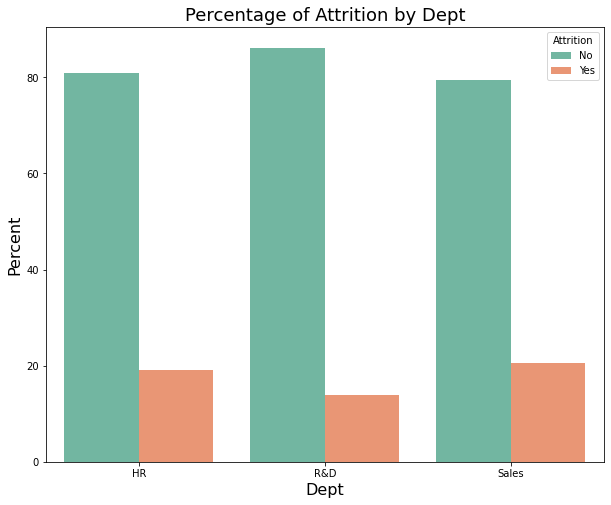

In [ ]:
df_dept = HR_data_clean.groupby('Department')['Attrition'].value_counts()
HR_0 = round(df_dept[0]/(df_dept[0]+df_dept[1])*100,2)
HR_1 = round(df_dept[1]/(df_dept[0]+df_dept[1])*100,2)
RD_0 = round(df_dept[2]/(df_dept[2]+df_dept[3])*100,2)
RD_1 = round(df_dept[3]/(df_dept[2]+df_dept[3])*100,2)
Sales_0 = round(df_dept[4]/(df_dept[4]+df_dept[5])*100,2)
Sales_1 = round(df_dept[5]/(df_dept[4]+df_dept[5])*100,2)
df_dept_percent = pd.DataFrame({'Dept':['HR','HR','R&D','R&D','Sales','Sales'],'Percent':[HR_0,HR_1,RD_0,RD_1,Sales_0,Sales_1],'Attrition':['No','Yes','No','Yes','No','Yes']})
df_dept_percent
plt.figure(figsize=(10,8))
sns.barplot('Dept','Percent',hue='Attrition',data = df_dept_percent,palette='Set2')
plt.title('Percentage of Attrition by Dept',fontsize=18)
plt.ylabel('Percent',fontsize=16)
plt.xlabel('Dept',fontsize=16)
plt.show()
#Employees in Sales Dept are more likely to leave the company. 

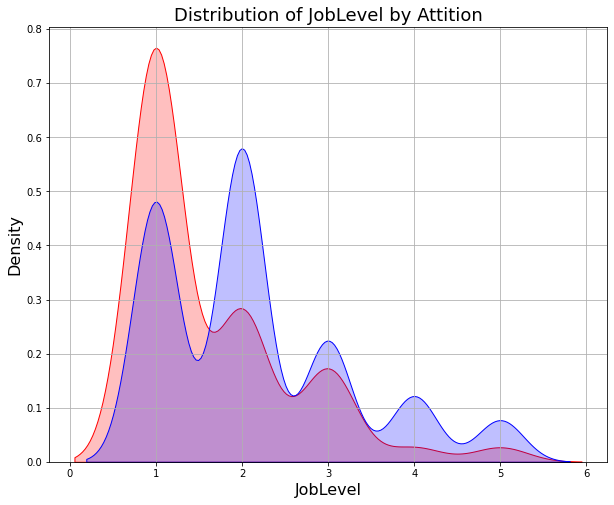

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(left_df['JobLevel'],label= 'Attrition:Yes', shade = True, color = 'r')
sns.kdeplot(stayed_df['JobLevel'], label= 'Attrition:No', shade = True, color = 'b')
plt.title('Distribution of JobLevel by Attition',fontsize=18)
plt.ylabel('Density',fontsize=16)
plt.xlabel('JobLevel',fontsize=16)
plt.grid(True)
plt.show()
#Employees in lower job level are more likely to leave the company. The range is concentrated around level 1.

**3.Personal Income**

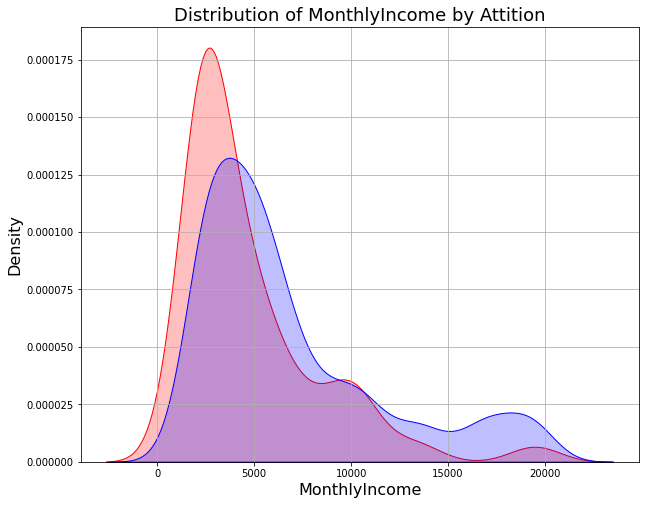

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(left_df['MonthlyIncome'],label= 'Attrition:Yes', shade = True, color = 'r')
sns.kdeplot(stayed_df['MonthlyIncome'], label= 'Attrition:No', shade = True, color = 'b')
plt.title('Distribution of MonthlyIncome by Attition',fontsize=18)
plt.ylabel('Density',fontsize=16)
plt.xlabel('MonthlyIncome',fontsize=16)
plt.grid(True)
plt.show()
#Employees with lower pay are more likely to leave the company. The range is concentrated under 4000.
#Employees with relatively high pay are also more likely to leave the company. The range is concentrated around 10,000.

**4.Satisfaction**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


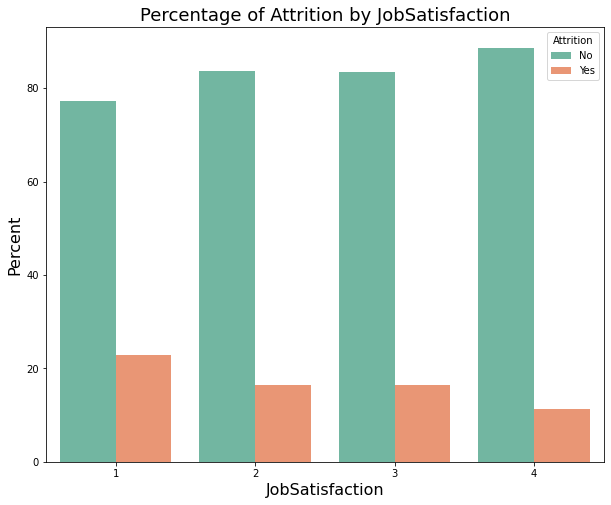

In [ ]:
df_jobsat = HR_data_clean.groupby('JobSatisfaction')['Attrition'].value_counts()

jobsat1_0 = round(df_jobsat.iloc[0]/(df_jobsat.iloc[0]+df_jobsat.iloc[1])*100,2)
jobsat1_1 = round(df_jobsat.iloc[1]/(df_jobsat.iloc[0]+df_jobsat.iloc[1])*100,2)
jobsat2_0 = round(df_jobsat.iloc[2]/(df_jobsat.iloc[2]+df_jobsat.iloc[3])*100,2)
jobsat2_1 = round(df_jobsat.iloc[3]/(df_jobsat.iloc[2]+df_jobsat.iloc[3])*100,2)
jobsat3_0 = round(df_jobsat.iloc[4]/(df_jobsat.iloc[4]+df_jobsat.iloc[5])*100,2)
jobsat3_1 = round(df_jobsat.iloc[5]/(df_jobsat.iloc[4]+df_jobsat.iloc[5])*100,2)
jobsat4_0 = round(df_jobsat.iloc[6]/(df_jobsat.iloc[6]+df_jobsat.iloc[7])*100,2)
jobsat4_1 = round(df_jobsat.iloc[7]/(df_jobsat.iloc[6]+df_jobsat.iloc[7])*100,2)
df_jobsat_percent = pd.DataFrame({'jobsat':['1','1','2','2','3','3','4','4'],'Percent':[jobsat1_0,jobsat1_1,jobsat2_0,jobsat2_1,jobsat3_0,jobsat3_1,jobsat4_0,jobsat4_1],'Attrition':['No','Yes','No','Yes','No','Yes','No','Yes']})
df_jobsat_percent
plt.figure(figsize=(10,8))
sns.barplot('jobsat','Percent',hue='Attrition',data = df_jobsat_percent,palette='Set2')
plt.title('Percentage of Attrition by JobSatisfaction',fontsize=18)
plt.ylabel('Percent',fontsize=16)
plt.xlabel('JobSatisfaction',fontsize=16)
plt.show()
#Employees with lower level of job satisfaction are more likely to leave the company. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


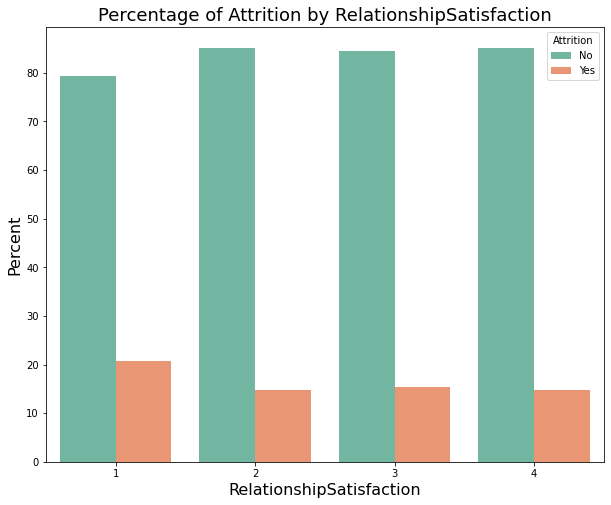

In [ ]:
df_relasat = HR_data_clean.groupby('RelationshipSatisfaction')['Attrition'].value_counts()
relsat1_0 = round(df_relasat.iloc[0]/(df_relasat.iloc[0]+df_relasat.iloc[1])*100,2)
relsat1_1 = round(df_relasat.iloc[1]/(df_relasat.iloc[0]+df_relasat.iloc[1])*100,2)
relsat2_0 = round(df_relasat.iloc[2]/(df_relasat.iloc[2]+df_relasat.iloc[3])*100,2)
relsat2_1 = round(df_relasat.iloc[3]/(df_relasat.iloc[2]+df_relasat.iloc[3])*100,2)
relsat3_0 = round(df_relasat.iloc[4]/(df_relasat.iloc[4]+df_relasat.iloc[5])*100,2)
relsat3_1 = round(df_relasat.iloc[5]/(df_relasat.iloc[4]+df_relasat.iloc[5])*100,2)
relsat4_0 = round(df_relasat.iloc[6]/(df_relasat.iloc[6]+df_relasat.iloc[7])*100,2)
relsat4_1 = round(df_relasat.iloc[7]/(df_relasat.iloc[6]+df_relasat.iloc[7])*100,2)
df_relsat_percent = pd.DataFrame({'relsat':['1','1','2','2','3','3','4','4'],'Percent':[relsat1_0,relsat1_1,relsat2_0,relsat2_1,relsat3_0,relsat3_1,relsat4_0,relsat4_1],'Attrition':['No','Yes','No','Yes','No','Yes','No','Yes']})
df_relsat_percent
plt.figure(figsize=(10,8))
sns.barplot('relsat','Percent',hue='Attrition',data = df_relsat_percent,palette='Set2')
plt.title('Percentage of Attrition by RelationshipSatisfaction',fontsize=18)
plt.ylabel('Percent',fontsize=16)
plt.xlabel('RelationshipSatisfaction',fontsize=16)
plt.show()
#Employees with lower level of relationship satisfaction are more likely to leave the company. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


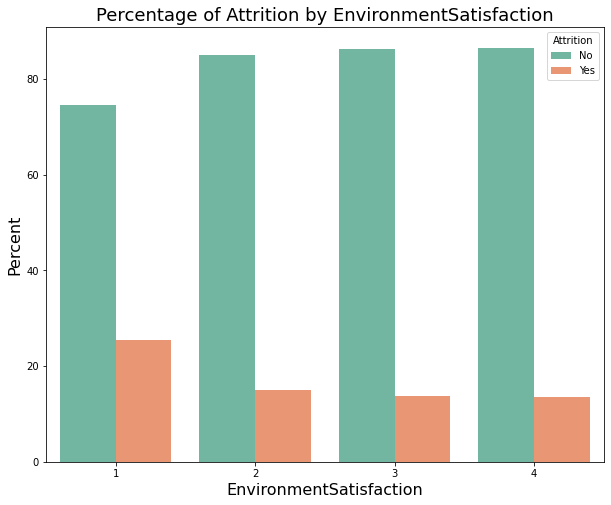

In [ ]:
df_envsat = HR_data_clean.groupby('EnvironmentSatisfaction')['Attrition'].value_counts()

envsat1_0 = round(df_envsat.iloc[0]/(df_envsat.iloc[0]+df_envsat.iloc[1])*100,2)
envsat1_1 = round(df_envsat.iloc[1]/(df_envsat.iloc[0]+df_envsat.iloc[1])*100,2)
envsat2_0 = round(df_envsat.iloc[2]/(df_envsat.iloc[2]+df_envsat.iloc[3])*100,2)
envsat2_1 = round(df_envsat.iloc[3]/(df_envsat.iloc[2]+df_envsat.iloc[3])*100,2)
envsat3_0 = round(df_envsat.iloc[4]/(df_envsat.iloc[4]+df_envsat.iloc[5])*100,2)
envsat3_1 = round(df_envsat.iloc[5]/(df_envsat.iloc[4]+df_envsat.iloc[5])*100,2)
envsat4_0 = round(df_envsat.iloc[6]/(df_envsat.iloc[6]+df_envsat.iloc[7])*100,2)
envsat4_1 = round(df_envsat.iloc[7]/(df_envsat.iloc[6]+df_envsat.iloc[7])*100,2)
df_envsat_percent = pd.DataFrame({'envsat':['1','1','2','2','3','3','4','4'],'Percent':[envsat1_0,envsat1_1,envsat2_0,envsat2_1,envsat3_0,envsat3_1,envsat4_0,envsat4_1],'Attrition':['No','Yes','No','Yes','No','Yes','No','Yes']})
df_envsat_percent
plt.figure(figsize=(10,8))
sns.barplot('envsat','Percent',hue='Attrition',data = df_envsat_percent,palette='Set2')
plt.title('Percentage of Attrition by EnvironmentSatisfaction',fontsize=18)
plt.ylabel('Percent',fontsize=16)
plt.xlabel('EnvironmentSatisfaction',fontsize=16)
plt.show()
#Employees with lower level of environment satisfaction are more likely to leave the company.

**5.Workload**

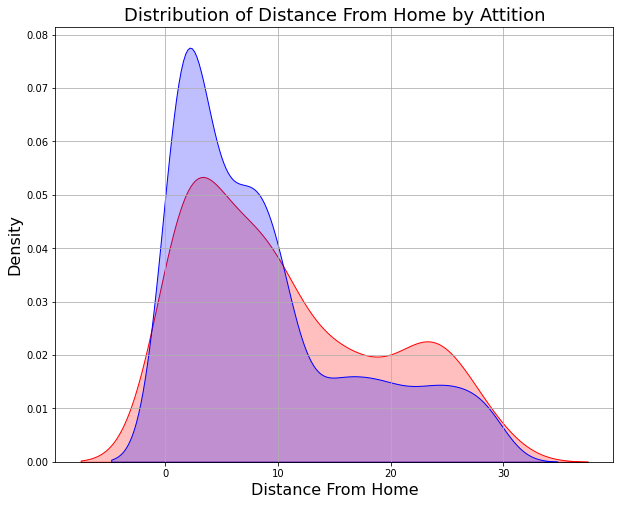

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(left_df['DistanceFromHome'],label= 'Attrition:Yes', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label= 'Attrition:No', shade = True, color = 'b')
plt.title('Distribution of Distance From Home by Attition',fontsize=18)
plt.ylabel('Density',fontsize=16)
plt.xlabel('Distance From Home',fontsize=16)
plt.grid(True)
plt.show()
#Employees who work farther away from home are more likely to leave the company. The range is concentrated from 10 to 30.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


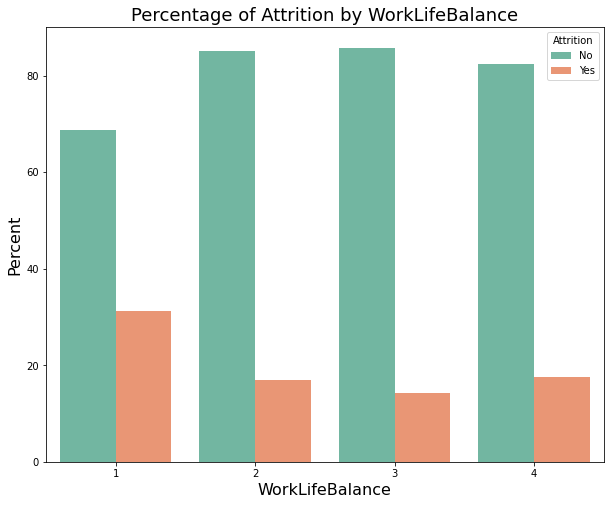

In [ ]:
df_balance = HR_data_clean.groupby('WorkLifeBalance')['Attrition'].value_counts()

balance1_0 = round(df_balance.iloc[0]/(df_balance.iloc[0]+df_balance.iloc[1])*100,2)
balance1_1 = round(df_balance.iloc[1]/(df_balance.iloc[0]+df_balance.iloc[1])*100,2)
balance2_0 = round(df_balance.iloc[2]/(df_balance.iloc[2]+df_balance.iloc[3])*100,2)
balance2_1 = round(df_balance.iloc[3]/(df_balance.iloc[2]+df_balance.iloc[3])*100,2)
balance3_0 = round(df_balance.iloc[4]/(df_balance.iloc[4]+df_balance.iloc[5])*100,2)
balance3_1 = round(df_balance.iloc[5]/(df_balance.iloc[4]+df_balance.iloc[5])*100,2)
balance4_0 = round(df_balance.iloc[6]/(df_balance.iloc[6]+df_balance.iloc[7])*100,2)
balance4_1 = round(df_balance.iloc[7]/(df_balance.iloc[6]+df_balance.iloc[7])*100,2)
df_balance_percent = pd.DataFrame({'balance':['1','1','2','2','3','3','4','4'],'Percent':[balance1_0,balance1_1,envsat2_0,balance2_1,balance3_0,balance3_1,balance4_0,balance4_1],'Attrition':['No','Yes','No','Yes','No','Yes','No','Yes']})
df_balance_percent
plt.figure(figsize=(10,8))
sns.barplot('balance','Percent',hue='Attrition',data = df_balance_percent,palette='Set2')
plt.title('Percentage of Attrition by WorkLifeBalance',fontsize=18)
plt.ylabel('Percent',fontsize=16)
plt.xlabel('WorkLifeBalance',fontsize=16)
plt.show()
#Employees with lower level of work life balance are more likely to leave the company. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


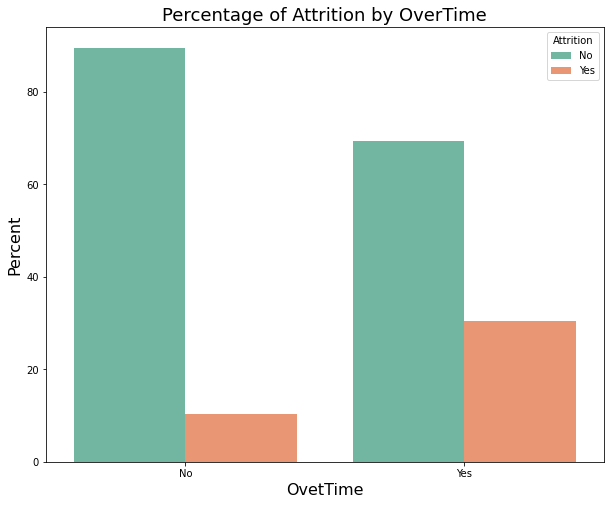

In [ ]:
df_ot = HR_data_clean.groupby('OverTime')['Attrition'].value_counts()

ot1_0 = round(df_ot.iloc[0]/(df_ot.iloc[0]+df_ot.iloc[1])*100,2)
ot1_1 = round(df_ot.iloc[1]/(df_ot.iloc[0]+df_ot.iloc[1])*100,2)
ot2_0 = round(df_ot.iloc[2]/(df_ot.iloc[2]+df_ot.iloc[3])*100,2)
ot2_1 = round(df_ot.iloc[3]/(df_ot.iloc[2]+df_ot.iloc[3])*100,2)
df_ot_percent = pd.DataFrame({'ot':['No','No','Yes','Yes'],'Percent':[ot1_0,ot1_1,ot2_0,ot2_1],'Attrition':['No','Yes','No','Yes']})
df_ot_percent
plt.figure(figsize=(10,8))
sns.barplot('ot','Percent',hue='Attrition',data = df_ot_percent,palette='Set2')
plt.title('Percentage of Attrition by OverTime',fontsize=18)
plt.ylabel('Percent',fontsize=16)
plt.xlabel('OvetTime',fontsize=16)
plt.show()
#Employees who work over time are more likely to leave the company. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


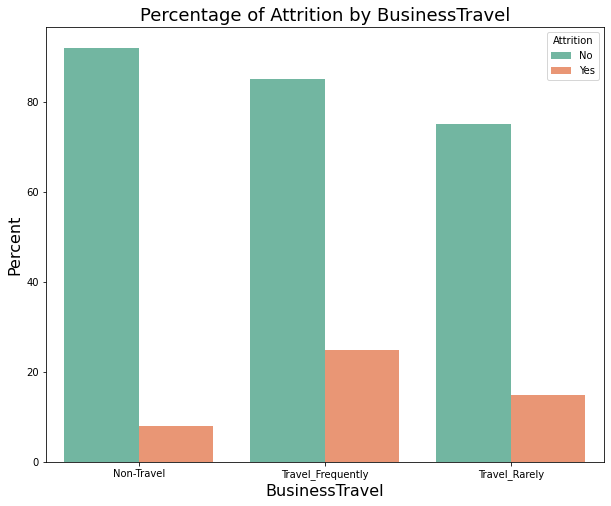

In [ ]:
df_travel = HR_data_clean.groupby('BusinessTravel')['Attrition'].value_counts()

travel1_0 = round(df_travel.iloc[0]/(df_travel.iloc[0]+df_travel.iloc[1])*100,2)
travel1_1 = round(df_travel.iloc[1]/(df_travel.iloc[0]+df_travel.iloc[1])*100,2)
travel2_0 = round(df_travel.iloc[2]/(df_travel.iloc[2]+df_travel.iloc[3])*100,2)
travel2_1 = round(df_travel.iloc[3]/(df_travel.iloc[2]+df_travel.iloc[3])*100,2)
travel3_0 = round(df_travel.iloc[4]/(df_travel.iloc[4]+df_travel.iloc[5])*100,2)
travel3_1 = round(df_travel.iloc[5]/(df_travel.iloc[4]+df_travel.iloc[5])*100,2)
df_travel
df_travel_percent = pd.DataFrame({'travel':['Non-Travel','Non-Travel','Travel_Frequently','Travel_Rarely','Travel_Rarely','Travel_Frequently'],'Percent':[travel1_0,travel1_1,travel3_0,travel3_1,travel2_0,travel2_1],'Attrition':['No','Yes','No','Yes','No','Yes']})
df_travel_percent
plt.figure(figsize=(10,8))
sns.barplot('travel','Percent',hue='Attrition',data = df_travel_percent,palette='Set2')
plt.title('Percentage of Attrition by BusinessTravel',fontsize=18)
plt.ylabel('Percent',fontsize=16)
plt.xlabel('BusinessTravel',fontsize=16)
plt.show()
#Employees on business travel more frequently are more likely to leave the company. 

In [88]:
HR_data_clean = pd.concat([HR_data_clean, pd.get_dummies(HR_data_clean["BusinessTravel"], drop_first=False)], axis=1)
HR_data_clean = pd.concat([HR_data_clean, pd.get_dummies(HR_data_clean["Department"], drop_first=False)], axis=1)
HR_data_clean = pd.concat([HR_data_clean, pd.get_dummies(HR_data_clean["EducationField"], drop_first=False)], axis=1)
HR_data_clean = pd.concat([HR_data_clean, pd.get_dummies(HR_data_clean["JobRole"], drop_first=False)], axis=1)
HR_data_clean = pd.concat([HR_data_clean, pd.get_dummies(HR_data_clean["Gender"], drop_first=False)], axis=1)
HR_data_clean = pd.concat([HR_data_clean, pd.get_dummies(HR_data_clean["MaritalStatus"], drop_first=False)], axis=1)
HR_data_clean = pd.concat([HR_data_clean, pd.get_dummies(HR_data_clean["OverTime"], drop_first=False)], axis=1)

HR_data_clean = HR_data_clean.drop(columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole','Gender','MaritalStatus','OverTime'])
HR_data_clean = HR_data_clean.rename(columns={"No": "OverTime_NO", "Yes": "OverTime_YES", "Other": "Education_OTHER"}, errors="raise")

HR_data_clean.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Education_OTHER', 'Technical Degree',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Female', 'Male', 'Divorced', 'Married', 'Single', 'OverTime_NO',
      

In [89]:
HR_data_clean.columns = ['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Human Resources_department',
       'Research & Development', 'Sales', 'Human Resources_education field', 'Life Sciences',
       'Marketing', 'Medical', 'Education_OTHER', 'Technical Degree',
       'Healthcare Representative', 'Human Resources_job role', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Female', 'Male', 'Divorced', 'Married', 'Single', 'OverTime_NO',
       'OverTime_YES']
       

In [90]:
HR_data_clean.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Human Resources_department',
       'Research & Development', 'Sales', 'Human Resources_education field',
       'Life Sciences', 'Marketing', 'Medical', 'Education_OTHER',
       'Technical Degree', 'Healthcare Representative',
       'Human Resources_job role', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Female', 'Male', 'Divorced',
      

In [8]:
HR_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1470 non-null   int64
 1   Attrition                        1470 non-null   int64
 2   DistanceFromHome                 1470 non-null   int64
 3   Education                        1470 non-null   int64
 4   EnvironmentSatisfaction          1470 non-null   int64
 5   JobInvolvement                   1470 non-null   int64
 6   JobLevel                         1470 non-null   int64
 7   JobSatisfaction                  1470 non-null   int64
 8   MonthlyIncome                    1470 non-null   int64
 9   MonthlyRate                      1470 non-null   int64
 10  NumCompaniesWorked               1470 non-null   int64
 11  PercentSalaryHike                1470 non-null   int64
 12  PerformanceRating                1470 non-null  

**Data Visualizations**

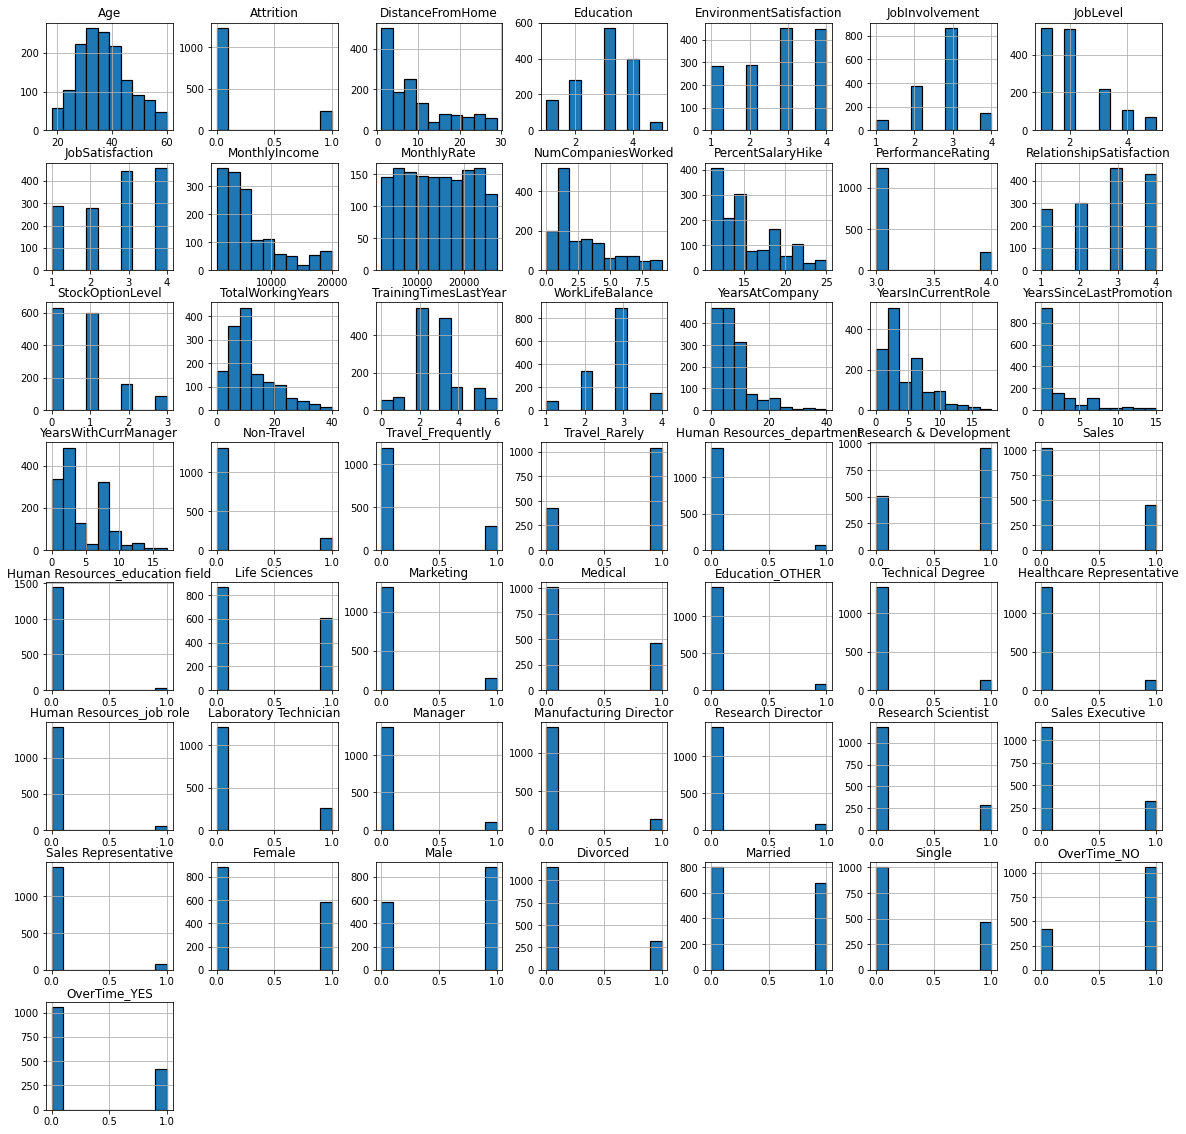

In [ ]:
HR_data_clean.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

numerical = [u'Age', u'DistanceFromHome', 
             u'Education', u'EnvironmentSatisfaction', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= HR_data_clean[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=HR_data_clean[numerical].columns.values,
        y=HR_data_clean[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


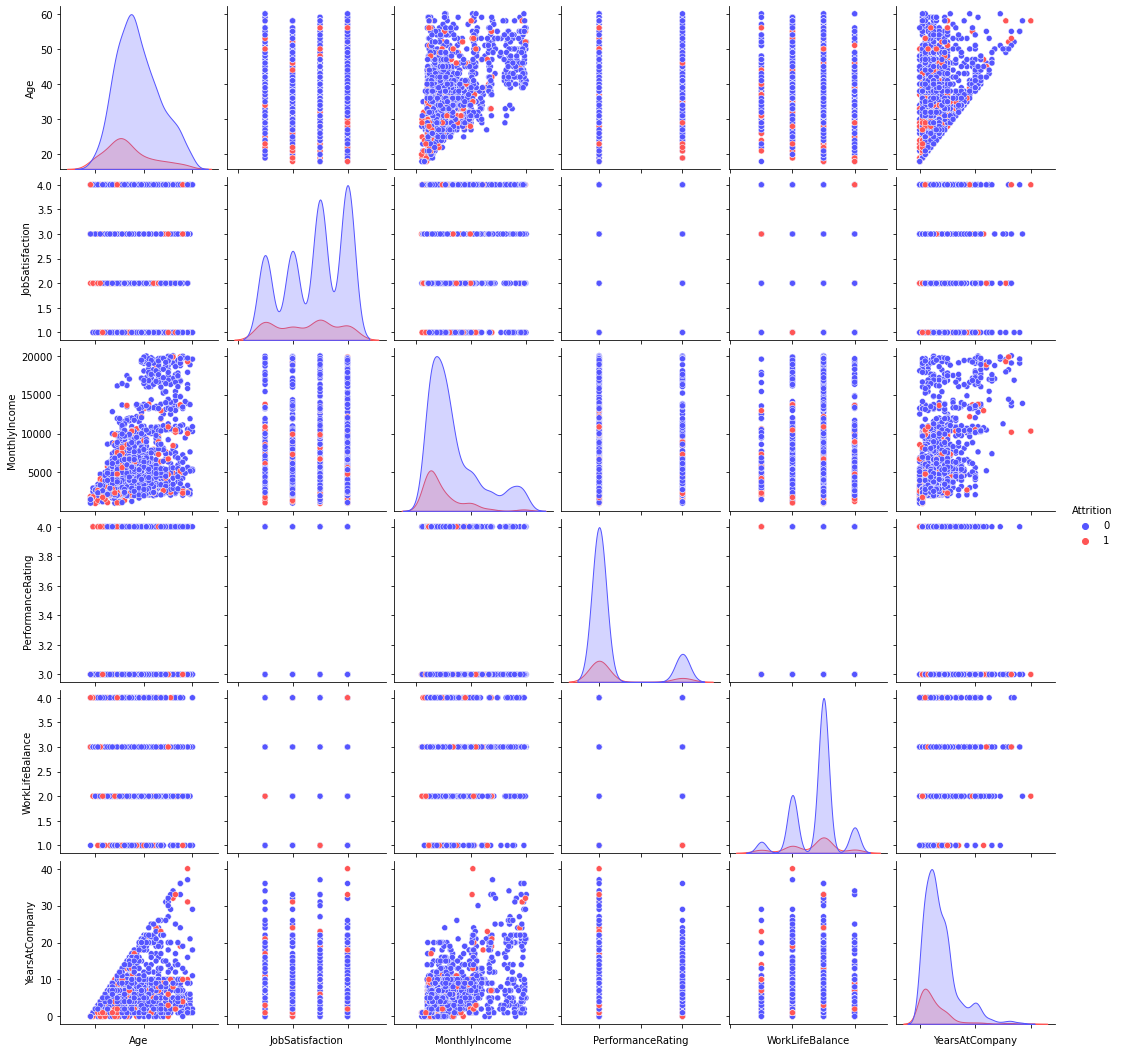

In [ ]:
numerical = [u'Age',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition']

g = sns.pairplot(HR_data_clean[numerical], hue='Attrition', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])


**Show imbalance**

0    1233
1     237
Name: Attrition, dtype: int64

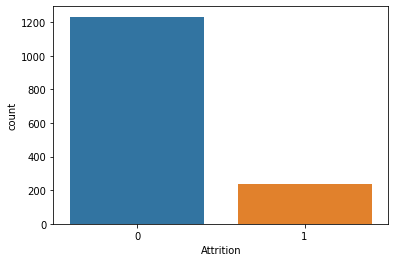

In [9]:
sns.countplot(x='Attrition', data=HR_data_clean)
HR_data_clean.Attrition.value_counts()

**Since there exists imbalance problem, we are going to split the data and then use SMOTE method to mitigate the issue**

In [93]:
from imblearn.over_sampling import SMOTE

X = HR_data_clean[['Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Human Resources_department',
       'Research & Development', 'Sales', 'Human Resources_education field',
       'Life Sciences', 'Marketing', 'Medical', 'Education_OTHER',
       'Technical Degree', 'Healthcare Representative',
       'Human Resources_job role', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Female', 'Male', 'Divorced',
       'Married', 'Single', 'OverTime_NO', 'OverTime_YES']]

y = HR_data_clean['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70)
X_train

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources_department,Research & Development,Sales,Human Resources_education field,Life Sciences,Marketing,Medical,Education_OTHER,Technical Degree,Healthcare Representative,Human Resources_job role,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Female,Male,Divorced,Married,Single,OverTime_NO,OverTime_YES
558,32,24,4,1,3,2,4,5309,21146,1,15,3,4,2,10,2,3,10,8,4,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
524,34,9,3,4,2,3,2,8621,17654,1,14,3,2,0,9,3,4,8,7,7,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
322,32,2,4,1,4,2,4,5055,10557,7,16,3,3,0,10,0,2,7,7,0,7,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0
774,55,2,1,3,2,4,1,16756,17323,7,15,3,2,0,31,3,4,9,7,6,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
288,26,16,4,1,3,1,2,2373,14180,2,13,3,4,1,5,2,3,3,2,0,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,40,1,4,2,3,1,2,2387,6762,3,22,4,3,1,7,3,3,4,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
46,34,23,4,2,3,2,3,4568,10034,0,20,4,3,0,10,2,3,9,5,8,7,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
1155,39,3,2,3,2,2,3,3069,10302,0,15,3,4,1,11,3,3,10,8,0,7,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
1406,54,10,3,3,3,2,1,4440,25198,6,19,3,4,0,9,3,3,5,2,1,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1


In [94]:
oversampler=SMOTE()
X_train, y_train = oversampler.fit_sample(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**PCA model**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df_pca = HR_data_clean.copy().drop(columns = 'Attrition')
scaler = StandardScaler()
scaler.fit(df_pca)
scaled_data = scaler.transform(df_pca)
scaled_data

pca = PCA(n_components = 2)
pca.fit(scaled_data)
components = pca.transform(scaled_data)
scaled_data.shape
components.shape

(1470, 2)

In [13]:
pca_values_df = pd.DataFrame(data = components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_values_df.insert(0, "Attrition", HR_data_clean["Attrition"].values, True)
pca_values_df

,Attrition,Principal Component 1,Principal Component 2
0,1,-0.019976,2.344776
1,0,0.046904,-1.570737
2,1,-2.915091,-0.946972
3,0,-1.194466,-1.023200
4,0,-2.130919,-1.210549
...,...,...,...
1465,0,-1.122667,-1.387718
1466,0,0.912395,-1.472483
1467,0,-1.069833,-1.275472
1468,0,1.185568,1.998797


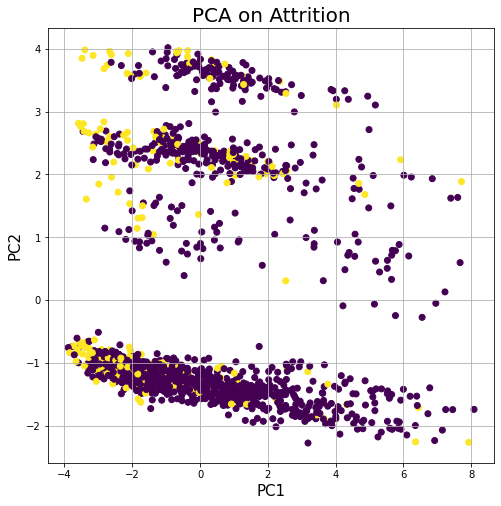

In [91]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA on Attrition', fontsize = 20)

n = pca_values_df['Attrition'].values.copy()
plt.scatter(pca_values_df['Principal Component 1'], pca_values_df['Principal Component 2'],c=n,cmap='viridis')

x = pca_values_df['Principal Component 1'].values.copy()
y = pca_values_df['Principal Component 2'].values.copy()


#for i, txt in enumerate(n):
#    plt.annotate(txt, (x[i], y[i]))
    
ax.grid()

**SVM model**

In [15]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
      
clf = svm.SVC()
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.5124716553287982

Classification Report: 
 	Precision: 0.20833333333333334
	Recall Score: 0.6666666666666666
	F1 score: 0.3174603174603175

Confusion Matrix: 
 [[176 190]
 [ 25  50]]



**Logistics Regression Model**

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print_score(logreg, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7256235827664399

Classification Report: 
 	Precision: 0.26515151515151514
	Recall Score: 0.5932203389830508
	F1 score: 0.3664921465968586

Confusion Matrix: 
 [[285  97]
 [ 24  35]]



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Decision Tree**

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_score, recall_score, f1_score
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7709750566893424

Classification Report: 
 	Precision: 0.2765957446808511
	Recall Score: 0.4406779661016949
	F1 score: 0.33986928104575165

Confusion Matrix: 
 [[314  68]
 [ 33  26]]



**DT - Tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
print_score(tree_cv, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 10504 tasks      | elapsed:   47.2s


Test Result:

accuracy score: 0.7664399092970522

Classification Report: 
 	Precision: 0.3670886075949367
	Recall Score: 0.35365853658536583
	F1 score: 0.3602484472049689

Confusion Matrix: 
 [[309  50]
 [ 53  29]]



[Parallel(n_jobs=-1)]: Done 12993 out of 12996 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:  1.0min finished


In [76]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = df.drop(columns = ['Over18','EmployeeCount', 'EmployeeNumber','DailyRate','HourlyRate','StandardHours'])
from sklearn.preprocessing import LabelEncoder
x = df['Attrition']
y = df['Gender']
z = df['OverTime']
le = LabelEncoder()
x = le.fit_transform(x)
y = le.fit_transform(y)
z = le.fit_transform(z)

df['Attrition'] = x
df['Gender'] = y
df['OverTime'] = z

df = pd.concat([df, pd.get_dummies(df["BusinessTravel"], drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df["Department"], drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df["EducationField"], drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df["JobRole"], drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df["MaritalStatus"], drop_first=False)], axis=1)

df = df.drop(columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole','MaritalStatus'])
df = df.rename(columns={"Other": "Education_OTHER"}, errors="raise")

df.columns = ['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Human Resources_a',
       'Research & Development', 'Sales', 'Human Resources_b', 'Life Sciences',
       'Marketing', 'Medical', 'Education_OTHER', 'Technical Degree',
       'Healthcare Representative', 'Human Resources_c', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single']
X_test = df[['Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Human Resources_a',
       'Research & Development', 'Sales', 'Human Resources_b', 'Life Sciences',
       'Marketing', 'Medical', 'Education_OTHER', 'Technical Degree',
       'Healthcare Representative', 'Human Resources_c', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single']]
y = df['Attrition']
xtrain, xtest, ytrain, ytest = train_test_split(X_test, y, train_size= 0.70)
type(xtrain)
#oversampler=SMOTE()
#xtrain, ytrain = oversampler.fit_sample(xtrain,ytrain)


pandas.core.frame.DataFrame

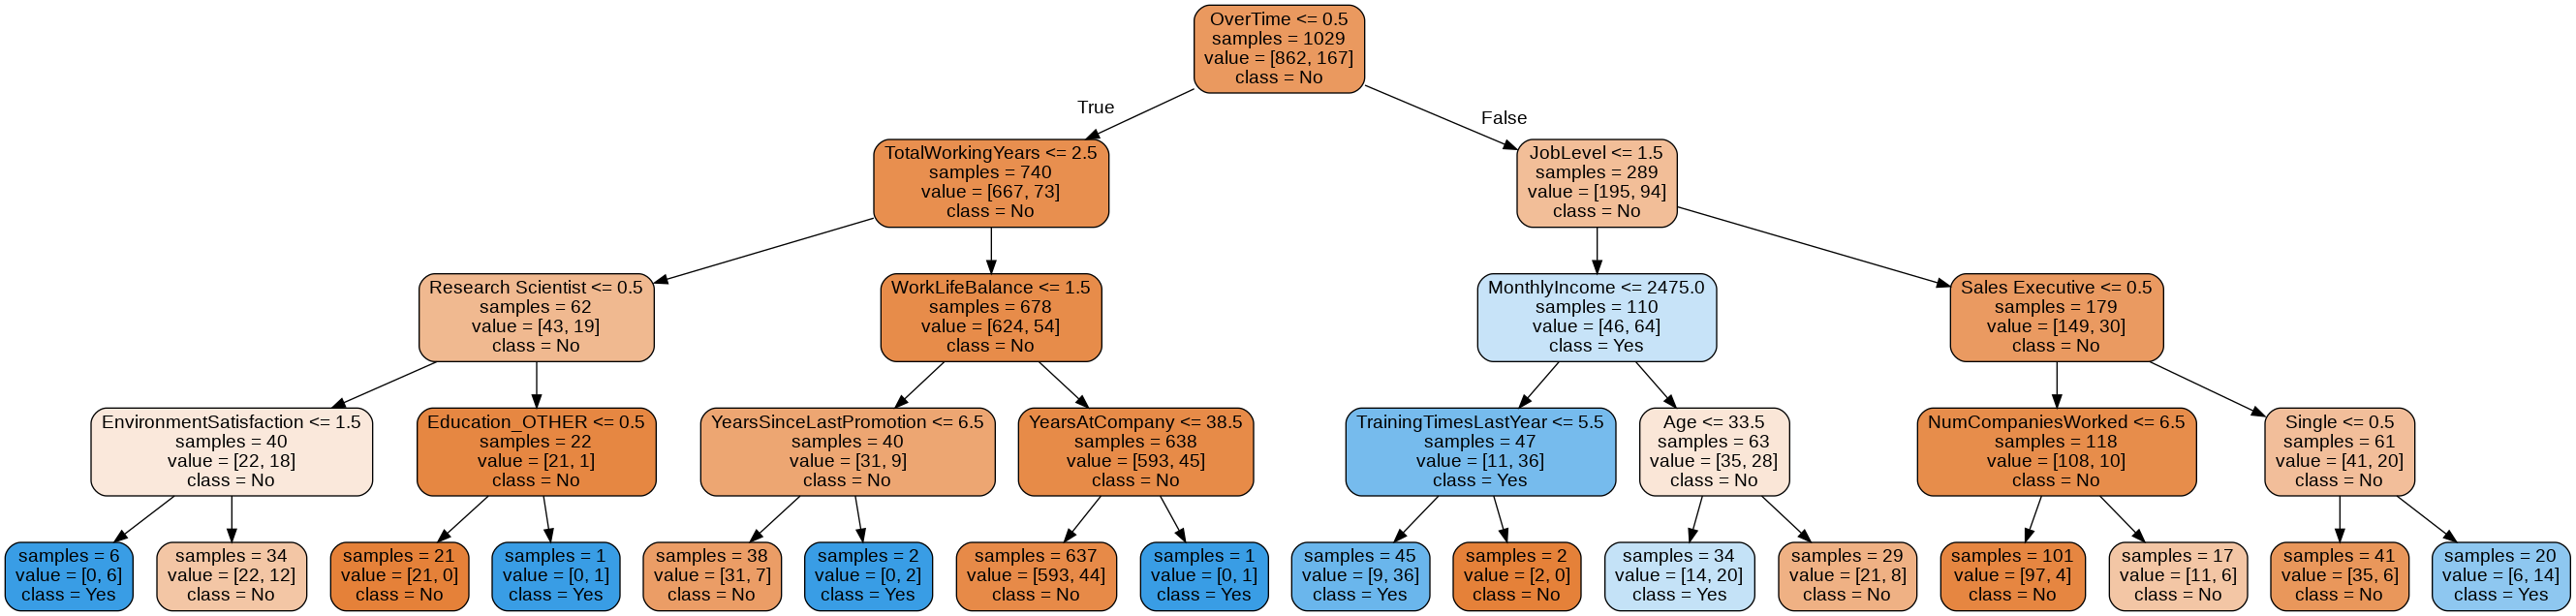

In [80]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(b)

with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = xtrain.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=500, width=1900)


**Random Forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.873015873015873

Classification Report: 
 	Precision: 0.5428571428571428
	Recall Score: 0.3220338983050847
	F1 score: 0.4042553191489362

Confusion Matrix: 
 [[366  16]
 [ 40  19]]



**RF - Tune the model with parameters**

In [100]:
seed = 0  
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 10,
    'max_depth': 20,
    'min_samples_leaf': 5,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train, y_train)
print_score(rf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8798185941043084

Classification Report: 
 	Precision: 0.575
	Recall Score: 0.3898305084745763
	F1 score: 0.46464646464646464

Confusion Matrix: 
 [[365  17]
 [ 36  23]]



In [101]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.8min


Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})
Test Result:

accuracy score: 0.8888888888888888

Classification Report: 
 	Precision: 0.65625
	Recall Score: 0.3559322033898305
	F1 score: 0.46153846153846156

Confusion Matrix: 
 [[371  11]
 [ 38  21]]



In [104]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 44.9min finished


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}
Test Result:

accuracy score: 0.8866213151927438

Classification Report: 
 	Precision: 0.6451612903225806
	Recall Score: 0.3389830508474576
	F1 score: 0.4444444444444444

Confusion Matrix: 
 [[371  11]
 [ 39  20]]



**Feature ranking via rf**

In [ ]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print_score(gb, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8639455782312925

Classification Report: 
 	Precision: 0.7391304347826086
	Recall Score: 0.4146341463414634
	F1 score: 0.53125

Confusion Matrix: 
 [[347  12]
 [ 48  34]]



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
gb.fit(X_train, y_train)
print_score(gb, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8662131519274376

Classification Report: 
 	Precision: 0.7555555555555555
	Recall Score: 0.4146341463414634
	F1 score: 0.5354330708661418

Confusion Matrix: 
 [[348  11]
 [ 48  34]]



**Prepocessing data for regression**

In [ ]:
# # use monthly income as the target variable for regression
# X_reg = HR_data_clean[['Age', 'DistanceFromHome', 'Education',
#        'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
#        'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
#        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
#        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
#        'Travel_Frequently', 'Travel_Rarely', 'Human Resources_department',
#        'Research & Development', 'Sales', 'Human Resources_education field',
#        'Life Sciences', 'Marketing', 'Medical', 'Education_OTHER',
#        'Technical Degree', 'Healthcare Representative',
#        'Human Resources_job role', 'Laboratory Technician', 'Manager',
#        'Manufacturing Director', 'Research Director', 'Research Scientist',
#        'Sales Executive', 'Sales Representative', 'Female', 'Male', 'Divorced',
#        'Married', 'Single', 'OverTime_YES']]

# y_reg = HR_data_clean['MonthlyIncome']

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, train_size= 0.70, random_state=42)

In [ ]:
# use monthly income as the target variable for regression
X_reg = HR_data_clean[['Age', 'Education', 'JobInvolvement', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Research & Development', 'Sales', 
       'Life Sciences', 'Marketing', 'Medical', 'Education_OTHER',
       'Technical Degree', 'Healthcare Representative','Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Female', 'Divorced',
       'Married', 'OverTime_YES']]

y_reg = HR_data_clean['MonthlyIncome']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, train_size= 0.70, random_state=42)

In [ ]:
# # use monthly income as the target variable for regression
# X_reg = HR_data_clean[['Age', 'DistanceFromHome', 'Education',
#        'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
#        'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
#        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
#        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager', 
#        'Travel_Frequently', 'Travel_Rarely', 
#        'Research & Development', 'Sales', 
#        'Life Sciences', 'Marketing', 'Medical', 'Education_OTHER',
#        'Technical Degree', 'Healthcare Representative','Laboratory Technician', 'Manager',
#        'Manufacturing Director', 'Research Director', 'Research Scientist',
#        'Sales Executive', 'Sales Representative', 'Female', 'Divorced',
#        'Married', 'OverTime_YES']]

# y_reg = HR_data_clean['MonthlyIncome']

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, train_size= 0.70, random_state=42)

In [ ]:
# prepare for the metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X_reg, y_reg, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
# rescale the data to make better predictions
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train_reg = pipeline.fit_transform(X_train_reg)
X_test_reg = pipeline.transform(X_test_reg)

**Linear regression**

Intercept: 6449.796890184645
MAE: 880.726445123473
MSE: 1317020.0800299433
RMSE: 1147.6149528609076
R2 Square 0.934882625844713


,Coefficient
Age,-10.296672
Education,8.326474
JobInvolvement,-50.252396
JobLevel,3201.006227
MonthlyRate,-28.921052
NumCompaniesWorked,40.794858
PerformanceRating,-25.922504
StockOptionLevel,-2.748921
TotalWorkingYears,251.697478
TrainingTimesLastYear,-0.032968


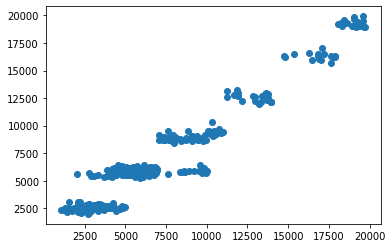

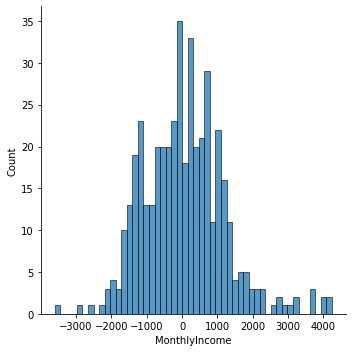

In [ ]:
from sklearn.linear_model import LinearRegression
# train the model
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_reg,y_train_reg)

# print out the results and explain for the coefficients
print('Intercept:', lin_reg.intercept_)
coeff_df_1 = pd.DataFrame(lin_reg.coef_, X_reg.columns, columns=['Coefficient'])


# predict and plot
pred = lin_reg.predict(X_test_reg)
plt.scatter(y_test_reg, pred)
print_evaluate(y_test_reg, pred)

# print out the residual histogram
sns.displot((y_test_reg - pred), bins=50)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test_reg, pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

coeff_df_1

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

model_1 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model_1.fit(X_train_reg, y_train_reg)
pred = model_1.predict(X_test_reg)

print_evaluate(y_test_reg, pred)


results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test_reg, pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

coeff_df_2 = pd.DataFrame(model_1.coef_, X_reg.columns, columns=['Coefficient'])
coeff_df_2

MAE: 914.0635905528667
MSE: 1356797.4867955686
RMSE: 1164.8165034869521
R2 Square 0.9329159130219098


,Coefficient
Age,52.023960
Education,-10.951790
JobInvolvement,-51.333914
JobLevel,2385.608492
MonthlyRate,-10.300375
NumCompaniesWorked,32.856293
PerformanceRating,-34.004723
StockOptionLevel,-11.059505
TotalWorkingYears,558.610978
TrainingTimesLastYear,-2.134151


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

model_2 = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model_2.fit(X_train_reg, y_train_reg)
coeff_df_3 = pd.DataFrame(model_2.coef_, X_reg.columns, columns=['Coefficient'])


test_pred = model_2.predict(X_test_reg)
print_evaluate(y_test_reg, test_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test_reg, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

coeff_df_3

MAE: 877.9460504677801
MSE: 1320197.508761396
RMSE: 1148.99848074808
R2 Square 0.934725524355757


,Coefficient
Age,1.578464
Education,5.496498
JobInvolvement,0.000000
JobLevel,3231.912983
MonthlyRate,0.000000
NumCompaniesWorked,49.099602
PerformanceRating,0.000000
StockOptionLevel,0.000000
TotalWorkingYears,224.479003
TrainingTimesLastYear,0.000000


In [ ]:
from sklearn.linear_model import ElasticNet

model_3 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model_3.fit(X_train_reg, y_train_reg)

test_pred = model_3.predict(X_test_reg)
print_evaluate(y_test_reg, test_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test_reg, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

coeff_df_4 = pd.DataFrame(model_3.coef_, X_reg.columns, columns=['Coefficient'])
coeff_df_4

MAE: 877.3133958276433
MSE: 1298775.1828897032
RMSE: 1139.6381806914435
R2 Square 0.9357847076060472


,Coefficient
Age,-6.316050
Education,4.761486
JobInvolvement,-51.064703
JobLevel,3055.641088
MonthlyRate,-25.988380
NumCompaniesWorked,37.603849
PerformanceRating,-27.840989
StockOptionLevel,-3.240261
TotalWorkingYears,310.608189
TrainingTimesLastYear,-0.689665


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train_reg, y_train_reg)

test_pred = rf_reg.predict(X_test_reg)
print_evaluate(y_test_reg, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test_reg, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)


MAE: 817.8265215419502
MSE: 1233829.2496640317
RMSE: 1110.7786681711311
R2 Square 0.9389958269335703


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=50)
rf_reg.fit(X_train_reg, y_train_reg)

test_pred = rf_reg.predict(X_test_reg)
print_evaluate(y_test_reg, test_pred)

MAE: 836.0955102040816
MSE: 1275935.7541968254
RMSE: 1129.5732619873868
R2 Square 0.9369139566176896


**Model Comparison**

In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,880.726445,1.317020e+06,1147.614953,0.934883,0.939593
1,Ridge Regression,914.063591,1.356797e+06,1164.816503,0.932916,0.939586
2,Lasso Regression,877.946050,1.320198e+06,1148.998481,0.934726,0.939794
3,Elastic Net Regression,877.313396,1.298775e+06,1139.638181,0.935785,0.831882
4,Random Forest Regressor,817.826522,1.233829e+06,1110.778668,0.938996,0.000000


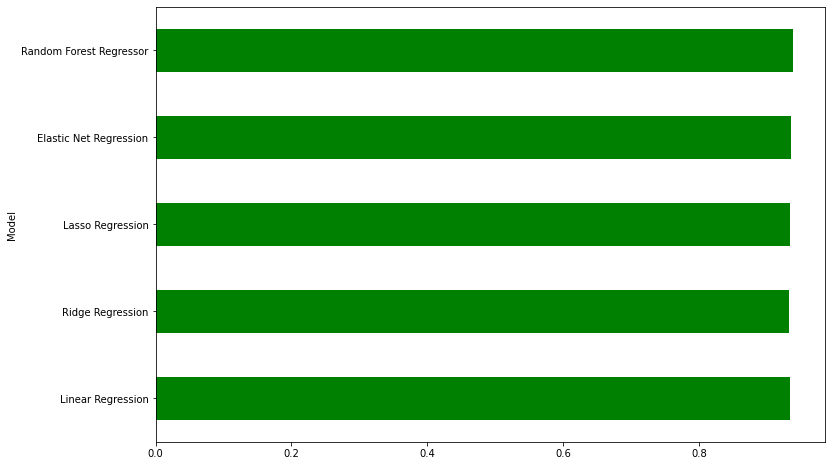

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8), colormap='ocean')